## Inicio: Librerias y Credenciales

### Importamos las librerias

In [1]:
#pip install pandas --upgrade

In [2]:
#pip install numpy --upgrade

In [3]:
#pip install seaborn --upgrade

In [4]:
#pip install matplot --upgrade

In [5]:
from melitk.analytics.connectors.core.authentication import Authentication
from melitk.analytics.connectors.teradata import ConnTeradata
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Para poder saber mi path dentro lab

In [6]:
import os
print(os.getcwd())

/alloc/data/fury_fco-bof/Analisis WL


## Subida de Bases de Datos

### Cargamos los datos de la API de Users

In [7]:
df_api = pd.read_csv(r'UsersAPI.csv')


In [8]:
df_api.shape

(8369, 6)

In [9]:
df_api.head(5)

,Unnamed: 0,id,registration_date,flag_internal,test_user,flag_on2
0,0,201114848,2015-12-16,0,0,0
1,1,79394233,2005-03-21,0,0,0
2,2,19524979,2007-06-09,0,0,0
3,3,171724486,2014-11-26,0,0,0
4,4,74937266,2004-08-03,0,0,0


### Cargamos los datos de la base de Teradata

In [10]:
df = pd.read_csv(r'ResWL.csv')

In [11]:
df.shape

(7848, 27)

In [12]:
df.head(5)

,CUS_CUST_ID,sit_site_id,cus_nickname,flag_on,flag_ca,flag_mia,flag_up,flag_trusted_seller,flag_gmv_high,flag_gmv_low,...,active_91_180,active_181_365,inactive,last_transaction,tpv_approved,gmv_not_refund,count_orders,cashout,gmv_claims_seller,count_claims_seller
0,201114848,MCO,NaN,0,0,0,1,0,0,0,...,1,0,0,2020-09-26,0.0000,0.00,0,0.00,0.00,0
1,79394233,MLB,TOROFFROAD,1,1,1,1,1,1,0,...,0,0,0,2021-03-21,104565.5113,149395.80,3147,99.64,17579.06,224
2,19524979,MLB,SJ ELETROIMPORTS,1,1,0,1,1,1,0,...,0,0,0,2021-03-21,67016.5128,102103.22,2389,1266.31,18153.92,231
3,171724486,MLB,MICHELINI PARTS,1,1,1,1,1,1,0,...,0,0,0,2021-03-21,89751.3989,133802.14,5694,373.52,13131.80,460
4,74937266,MLM,SKP_MX,1,1,1,1,1,1,0,...,0,0,0,2021-03-21,63727.4154,109327.71,2092,361.75,6433.09,125


### Cargamos los datos de la base de Legales

In [13]:
df_legales = pd.read_csv(r'base_legales.csv')

In [14]:
df_legales.shape

(1974, 1)

In [15]:
df_legales.head(5)

,cust_id
0,155261575
1,182644618
2,74162018
3,320253987
4,223316074


## Data Frame

### Left Join de los datos de la API Users con los de Teradata para tener el DF Parcial 1

In [16]:
df_parcial_1=pd.merge(left = df_api, right = df,
                  how = 'left',
                  left_on='id', right_on='CUS_CUST_ID')

In [17]:
df_parcial_1.shape

(8369, 33)

### Left Join de los datos de DF Parcial 1 con los de Legales para tener el DF Parcial 2

In [18]:
df_parcial_2=pd.merge(left = df_parcial_1, right = df_legales,
                  how = 'left',
                  left_on='id', right_on='cust_id')

In [19]:
df_parcial_2['cust_id'].fillna(0, inplace=True)

In [20]:
df_parcial_2.shape

(8369, 34)

In [21]:
df_parcial_2['cust_id'].fillna(0, inplace=True)

### Creo la columna flag_legales

In [22]:
cond = df_parcial_2['cust_id']!=0
df_parcial_2['flag_legales']= 0
df_parcial_2.loc[cond,'flag_legales'] = 1

In [23]:
df_parcial_2.value_counts('flag_legales')

flag_legales
0    8209
1     160
dtype: int64

### Filtro los usuarios de legales del analisis

In [24]:
df_parcial_3=df_parcial_2[df_parcial_2['flag_legales']==0]

In [25]:
df_parcial_3.shape

(8209, 35)

### Filtro los usuarios internos del analisis

In [26]:
df_parcial_4=df_parcial_3[df_parcial_3['flag_internal']==0]

In [27]:
df_parcial_4.shape

(8004, 35)

### Filtro los usuarios de test

In [28]:
df_final=df_parcial_4[df_parcial_4['test_user']==0]

In [29]:
df_final.shape

(7483, 35)

In [30]:
df_final = df_final.reset_index(drop=True)

In [31]:
df_final.head(5)

,Unnamed: 0,id,registration_date,flag_internal,test_user,flag_on2,CUS_CUST_ID,sit_site_id,cus_nickname,flag_on,...,inactive,last_transaction,tpv_approved,gmv_not_refund,count_orders,cashout,gmv_claims_seller,count_claims_seller,cust_id,flag_legales
0,0,201114848,2015-12-16,0,0,0,201114848.0,MCO,NaN,0.0,...,0.0,2020-09-26,0.0000,0.00,0.0,0.00,0.00,0.0,0.0,0
1,1,79394233,2005-03-21,0,0,0,79394233.0,MLB,TOROFFROAD,1.0,...,0.0,2021-03-21,104565.5113,149395.80,3147.0,99.64,17579.06,224.0,0.0,0
2,2,19524979,2007-06-09,0,0,0,19524979.0,MLB,SJ ELETROIMPORTS,1.0,...,0.0,2021-03-21,67016.5128,102103.22,2389.0,1266.31,18153.92,231.0,0.0,0
3,3,171724486,2014-11-26,0,0,0,171724486.0,MLB,MICHELINI PARTS,1.0,...,0.0,2021-03-21,89751.3989,133802.14,5694.0,373.52,13131.80,460.0,0.0,0
4,4,74937266,2004-08-03,0,0,0,74937266.0,MLM,SKP_MX,1.0,...,0.0,2021-03-21,63727.4154,109327.71,2092.0,361.75,6433.09,125.0,0.0,0


In [32]:
df_final.columns

Index(['Unnamed: 0', 'id', 'registration_date', 'flag_internal', 'test_user',
       'flag_on2', 'CUS_CUST_ID', 'sit_site_id', 'cus_nickname', 'flag_on',
       'flag_ca', 'flag_mia', 'flag_up', 'flag_trusted_seller',
       'flag_gmv_high', 'flag_gmv_low', 'flag_tpv_high', 'flag_tpv_low',
       'flag_repu_ml', 'flag_repu_glg', 'flag_repu_yor', 'active_0_30',
       'active_31_90', 'active_91_180', 'active_181_365', 'inactive',
       'last_transaction', 'tpv_approved', 'gmv_not_refund', 'count_orders',
       'cashout', 'gmv_claims_seller', 'count_claims_seller', 'cust_id',
       'flag_legales'],
      dtype='object')

### Creo una columna flago on final

In [33]:
cond = df_final['flag_on']==1
cond2 = df_final['flag_on2'] == 1
cond3 = (cond) | (cond2)
df_final['flag_on_final']= 0
df_final.loc[cond3,'flag_on_final'] = 1

### Creo una columna con una flag de actividad

In [34]:
cond = df_final['active_0_30']==1
cond2 = df_final['active_31_90'] == 1
cond3 = (cond) | (cond2)
df_final['activo']= 0
df_final.loc[cond3,'activo'] = 1

### Dropeo las columnas que no requiero en el data frame

In [35]:
df_final.drop(columns=['cust_id','CUS_CUST_ID','test_user','flag_legales','flag_internal','Unnamed: 0','flag_on2','flag_on','active_0_30','active_31_90','active_91_180','active_181_365','inactive'], inplace = True)

### Cambio el nombre de la columa id a CUS_CUST_ID

In [36]:
df_final.rename(columns={'id': 'CUS_CUST_ID'}, inplace=True)

### Despliego como quedo el df_final

In [37]:
df_final.fillna(0, inplace=True)

In [38]:
df_final.columns

Index(['CUS_CUST_ID', 'registration_date', 'sit_site_id', 'cus_nickname',
       'flag_ca', 'flag_mia', 'flag_up', 'flag_trusted_seller',
       'flag_gmv_high', 'flag_gmv_low', 'flag_tpv_high', 'flag_tpv_low',
       'flag_repu_ml', 'flag_repu_glg', 'flag_repu_yor', 'last_transaction',
       'tpv_approved', 'gmv_not_refund', 'count_orders', 'cashout',
       'gmv_claims_seller', 'count_claims_seller', 'flag_on_final', 'activo'],
      dtype='object')

In [39]:
df_final.head(5)

,CUS_CUST_ID,registration_date,sit_site_id,cus_nickname,flag_ca,flag_mia,flag_up,flag_trusted_seller,flag_gmv_high,flag_gmv_low,...,flag_repu_yor,last_transaction,tpv_approved,gmv_not_refund,count_orders,cashout,gmv_claims_seller,count_claims_seller,flag_on_final,activo
0,201114848,2015-12-16,MCO,0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,2020-09-26,0.0000,0.00,0.0,0.00,0.00,0.0,0,0
1,79394233,2005-03-21,MLB,TOROFFROAD,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,2021-03-21,104565.5113,149395.80,3147.0,99.64,17579.06,224.0,1,1
2,19524979,2007-06-09,MLB,SJ ELETROIMPORTS,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,2021-03-21,67016.5128,102103.22,2389.0,1266.31,18153.92,231.0,1,1
3,171724486,2014-11-26,MLB,MICHELINI PARTS,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,2021-03-21,89751.3989,133802.14,5694.0,373.52,13131.80,460.0,1,1
4,74937266,2004-08-03,MLM,SKP_MX,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,2021-03-21,63727.4154,109327.71,2092.0,361.75,6433.09,125.0,1,1


## Variables Discretas a Dummys

### tpv_approved

In [40]:
df_tpv = df_final[df_final['tpv_approved']!=0.0]

In [41]:
df_tpv['CUS_CUST_ID'].count()

6143

In [42]:
df_tpv['tpv_approved'].sum()*0.7

982193106.2361598

In [43]:
df_prueba = df_tpv[df_tpv['tpv_approved']<190000]

In [44]:
df_prueba['tpv_approved'].count()

4920

In [45]:
df_prueba['tpv_approved'].sum()

315209873.36689997

In [46]:
cond1 = df_final['tpv_approved'] == 0
df_final['tpv_nulo']= 0
df_final.loc[cond1,'tpv_nulo'] = 1

cond1 = df_final['tpv_approved'] <190000
cond2 = df_final['tpv_approved'] !=0
cond3 = cond1 & cond2
df_final['tpv_low']= 0
df_final.loc[cond3,'tpv_low'] = 1

cond1 = df_final['tpv_approved'] >=190000
df_final['tpv_high']= 0
df_final.loc[cond1,'tpv_high'] = 1

### gmv_not_refund

In [47]:
df_gmv = df_final[df_final['gmv_not_refund']!=0.0]

In [48]:
df_gmv['CUS_CUST_ID'].count()

5924

In [49]:
df_gmv['gmv_not_refund'].sum()*0.7

1042448622.824

In [50]:
df_gmv['gmv_not_refund'].mean()

251386.27925725863

In [51]:
df_prueba = df_gmv[df_gmv['gmv_not_refund']<900000]

In [52]:
df_prueba['gmv_not_refund'].count()

5658

In [53]:
df_prueba['gmv_not_refund'].sum()

854175322.46

In [54]:
cond1 = df_final['gmv_not_refund'] == 0
df_final['gmv_nulo']= 0
df_final.loc[cond1,'gmv_nulo'] = 1

cond1 = df_final['gmv_not_refund'] <900000
cond2 = df_final['gmv_not_refund'] !=0
cond3 = cond1 & cond2
df_final['gmv_low']= 0
df_final.loc[cond3,'gmv_low'] = 1

cond1 = df_final['gmv_not_refund'] >=900000
df_final['gmv_high']= 0
df_final.loc[cond1,'gmv_high'] = 1

### gmv_claims_seller

In [55]:
df_gmv_claim = df_final[df_final['gmv_claims_seller']!=0.0]

In [56]:
df_gmv_claim['CUS_CUST_ID'].count()

5796

In [57]:
df_gmv_claim['gmv_claims_seller'].sum()*0.7

76978201.23

In [58]:
df_gmv_claim['gmv_claims_seller'].mean()

18973.233074534164

In [59]:
df_gmv_claim = df_gmv_claim[df_gmv_claim['gmv_claims_seller']<80000]

In [60]:
df_gmv_claim['gmv_claims_seller'].count()

5567

In [61]:
df_gmv_claim['gmv_claims_seller'].sum()

62899969.93

cond1 = df_final['gmv_claims_seller'] == 0
df_final['gmv_claims_nulo']= 0
df_final.loc[cond1,'gmv_claims_nulo'] = 1

cond1 = df_final['gmv_claims_seller'] <80000
cond2 = df_final['gmv_claims_seller'] !=0
cond3 = cond1 & cond2
df_final['gmv_claims_low']= 0
df_final.loc[cond3,'gmv_claims_low'] = 1

cond1 = df_final['gmv_claims_seller'] >=80000
df_final['gmv_claims_high']= 0
df_final.loc[cond1,'gmv_claims_high'] = 1

### cashout

In [62]:
df_co = df_final[df_final['cashout']!=0.0]

In [63]:
df_co['CUS_CUST_ID'].count()

5000

In [64]:
df_co['cashout'].sum()*0.7

4763935.687

In [65]:
df_co['cashout'].mean()

1361.124482

In [66]:
df_co = df_co[df_co['cashout']<4000]

In [67]:
df_co['cashout'].count()

4760

In [68]:
df_co['cashout'].sum()

3097945.9299999997

cond1 = df_final['cashout'] == 0
df_final['co_nulo']= 0
df_final.loc[cond1,'co_nulo'] = 1

cond1 = df_final['cashout'] <4000
cond2 = df_final['cashout'] !=0
cond3 = cond1 & cond2
df_final['co_low']= 0
df_final.loc[cond3,'co_low'] = 1

cond1 = df_final['cashout'] >=4000
df_final['co_high']= 0
df_final.loc[cond1,'co_high'] = 1

### count_orders

In [69]:
df_ord = df_final[df_final['count_orders']!=0.0]

In [70]:
df_ord['CUS_CUST_ID'].count()

6030

In [71]:
df_ord['count_orders'].sum()*0.7

27016418.799999997

In [72]:
df_ord['count_orders'].mean()

6400.478275290216

In [73]:
df_ord = df_ord[df_ord['count_orders']<13000]

In [74]:
df_ord['count_orders'].count()

5350

In [75]:
df_ord['count_orders'].sum()

17126936.0

cond1 = df_final['count_orders'] == 0
df_final['orders_nulo']= 0
df_final.loc[cond1,'orders_nulo'] = 1

cond1 = df_final['count_orders'] <13000
cond2 = df_final['count_orders'] !=0
cond3 = cond1 & cond2
df_final['orders_low']= 0
df_final.loc[cond3,'orders_low'] = 1

cond1 = df_final['count_orders'] >=13000
df_final['orders_high']= 0
df_final.loc[cond1,'orders_high'] = 1

### count_claims_seller

In [76]:
df_cla = df_final[df_final['count_claims_seller']!=0.0]

In [77]:
df_cla['CUS_CUST_ID'].count()

5796

In [78]:
df_cla['count_claims_seller'].sum()*0.7

1411426.0999999999

In [79]:
df_cla['count_claims_seller'].mean()

347.8818150448585

In [80]:
df_cla = df_co[df_co['count_claims_seller']<1000]

In [81]:
df_cla['count_claims_seller'].count()

4508

In [82]:
df_cla['count_claims_seller'].sum()

1097622.0

cond1 = df_final['count_claims_seller'] == 0
df_final['claims_nulo']= 0
df_final.loc[cond1,'claims_nulo'] = 1

cond1 = df_final['count_claims_seller'] <1000
cond2 = df_final['count_claims_seller'] !=0
cond3 = cond1 & cond2
df_final['claims_low']= 0
df_final.loc[cond3,'claims_low'] = 1

cond1 = df_final['count_claims_seller'] >=1000
df_final['claims_high']= 0
df_final.loc[cond1,'claims_high'] = 1

## Clustering Data Preparation

### Despliego los datos que tengo

In [83]:
df_final.sample(10)

,CUS_CUST_ID,registration_date,sit_site_id,cus_nickname,flag_ca,flag_mia,flag_up,flag_trusted_seller,flag_gmv_high,flag_gmv_low,...,tpv_approved,gmv_not_refund,count_orders,cashout,gmv_claims_seller,count_claims_seller,flag_on_final,activo,tpv_nulo,gmv_nulo
204,49557327,2008-05-12,MLB,IMPHERIAL SHOP,1.0,1.0,0.0,1.0,1.0,0.0,...,47707.0433,90814.26,7049.0,311.38,5597.79,326.0,1,1,0,0
5282,330123009,2018-06-21,MLM,TITI4182525,1.0,0.0,0.0,1.0,0.0,1.0,...,12975.8616,22242.95,1941.0,124.76,1388.23,100.0,1,1,0,0
4543,267634502,2017-08-07,MLM,VIESCA GOURMET,1.0,1.0,0.0,1.0,1.0,0.0,...,78652.9914,118682.09,4613.0,184.51,6746.84,152.0,1,1,0,0
6713,294571874,2018-01-07,MLM,PHONEDEPOT_ML,1.0,0.0,1.0,1.0,0.0,1.0,...,36695.4778,28876.75,237.0,83.38,14151.32,55.0,1,1,0,0
1141,425656487,2019-04-10,MLM,WETEK,1.0,1.0,0.0,1.0,0.0,1.0,...,11908.0142,18653.16,991.0,19.00,1792.32,103.0,1,1,0,0
1789,89476239,2005-11-22,MLB,ARTEEESTILOCOMERCIAL,1.0,1.0,1.0,1.0,1.0,0.0,...,43274.0759,56562.01,3159.0,155.46,2252.53,121.0,1,1,0,0
6930,187277879,2015-07-08,MLB,DELPARTS.,1.0,1.0,0.0,1.0,1.0,0.0,...,195881.9523,267238.58,8120.0,1334.91,30001.88,690.0,1,1,0,0
1073,502465500,2019-12-19,MLB,DROGÃO NET,1.0,1.0,0.0,1.0,1.0,0.0,...,836410.4341,1111852.64,65209.0,2884.15,52119.85,2653.0,1,1,0,0
5788,164971836,2014-08-20,MLB,MYCOMPRASTECNOLOGIA,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.00,0.0,0.00,0.00,0.0,1,0,1,1
3204,411978806,2019-03-01,MLM,CLJAPANMX,1.0,1.0,0.0,1.0,0.0,1.0,...,6667.9124,10263.55,250.0,0.00,452.13,10.0,1,1,0,0


In [84]:
df_final.columns

Index(['CUS_CUST_ID', 'registration_date', 'sit_site_id', 'cus_nickname',
       'flag_ca', 'flag_mia', 'flag_up', 'flag_trusted_seller',
       'flag_gmv_high', 'flag_gmv_low', 'flag_tpv_high', 'flag_tpv_low',
       'flag_repu_ml', 'flag_repu_glg', 'flag_repu_yor', 'last_transaction',
       'tpv_approved', 'gmv_not_refund', 'count_orders', 'cashout',
       'gmv_claims_seller', 'count_claims_seller', 'flag_on_final', 'activo',
       'tpv_nulo', 'gmv_nulo'],
      dtype='object')

### Dropeo las columnas que no van para el clustering

In [85]:
df_cluster=df_final.drop(columns=['last_transaction','registration_date','cashout','count_claims_seller','count_orders','cus_nickname','gmv_claims_seller','gmv_not_refund','sit_site_id','tpv_approved'])

In [86]:
df_cluster.columns

Index(['CUS_CUST_ID', 'flag_ca', 'flag_mia', 'flag_up', 'flag_trusted_seller',
       'flag_gmv_high', 'flag_gmv_low', 'flag_tpv_high', 'flag_tpv_low',
       'flag_repu_ml', 'flag_repu_glg', 'flag_repu_yor', 'flag_on_final',
       'activo', 'tpv_nulo', 'gmv_nulo'],
      dtype='object')

### Indexeo el CUS_CUST_ID

In [87]:
df_cluster.set_index('CUS_CUST_ID', inplace = True)

### Despliego los datos que me quedan para realizar el clustering

In [88]:
df_cluster.head(5)

,flag_ca,flag_mia,flag_up,flag_trusted_seller,flag_gmv_high,flag_gmv_low,flag_tpv_high,flag_tpv_low,flag_repu_ml,flag_repu_glg,flag_repu_yor,flag_on_final,activo,tpv_nulo,gmv_nulo
CUS_CUST_ID,,,,,,,,,,,,,,,
201114848,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,1
79394233,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1,0,0
19524979,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1,0,0
171724486,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1,0,0
74937266,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1,0,0


## Clustering

### Buscamos la cantidad de clusters a implementar

In [89]:
pip install kmodes

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [90]:
from kmodes.kmodes import KModes

Text(0.5, 0, 'Cantidad de clusters')

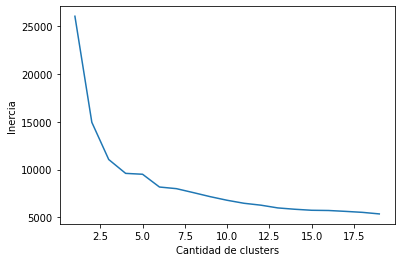

In [91]:
inercias = []
for i in range(1, 20):
    kmodes = KModes(n_clusters=i).fit(df_cluster)
    inercias.append(kmodes.cost_)
plt.plot(range(1, 20), inercias)
plt.ylabel('Inercia')
plt.xlabel('Cantidad de clusters')

 *Con el analisis del codo decidimos quedarnos con 3 clusters*

### Creamos los clusters

In [92]:
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.cluster import KMeans # K-means algorithm

In [93]:
X = df_cluster.values
X = np.nan_to_num(X)

sc = StandardScaler()

cluster_data = sc.fit_transform(X)
print('Cluster data samples : ', cluster_data[:3])

Cluster data samples :  [[-1.68974237 -1.54465946  1.22857221 -1.89271333 -1.14467504 -0.53805709
  -1.49318694 -0.38751655 -1.37407209 -0.2635495  -0.35464211 -2.5958363
  -2.23195312  2.14110447  1.94932596]
 [ 0.59180619  0.64739188  1.22857221  0.52834203  0.87361038 -0.53805709
   0.66970851 -0.38751655  0.72776386 -0.2635495  -0.35464211  0.3852323
   0.44803809 -0.46704867 -0.51299784]
 [ 0.59180619 -1.54465946  1.22857221  0.52834203  0.87361038 -0.53805709
   0.66970851 -0.38751655 -1.37407209 -0.2635495   2.81974413  0.3852323
   0.44803809 -0.46704867 -0.51299784]]


In [94]:
clusters = 3
model = KMeans(init = 'k-means++', 
               n_clusters = clusters, 
               n_init = 12)
model.fit(X)

labels = model.labels_
print(labels[:100])

[1 2 2 2 2 2 2 2 2 0 2 0 0 2 0 0 1 2 2 2 2 2 2 2 1 2 2 0 2 0 1 0 2 2 0 2 0
 2 2 2 0 2 2 0 2 0 2 2 2 0 0 2 2 1 1 2 2 2 2 1 1 0 2 1 2 1 2 2 2 2 1 1 2 2
 0 2 0 1 1 0 2 1 2 1 1 2 0 0 2 2 2 1 2 2 2 0 0 1 1 2]


### Asignamos los clusters a cada CUS_CUST_ID

In [95]:
df_cluster['cluster']=labels

In [96]:
df_cluster.shape

(7483, 16)

In [97]:
df_cluster = df_cluster.reset_index()

In [98]:
columns = ['CUS_CUST_ID','cluster']

In [99]:
df_bis = df_cluster[columns]

In [100]:

df_fin=pd.merge(left = df_final, right = df_bis,
                  how = 'left',
                  left_on='CUS_CUST_ID', right_on='CUS_CUST_ID')

### Despliego la data final ya clusterizada

In [101]:
df_fin.head(5)

,CUS_CUST_ID,registration_date,sit_site_id,cus_nickname,flag_ca,flag_mia,flag_up,flag_trusted_seller,flag_gmv_high,flag_gmv_low,...,gmv_not_refund,count_orders,cashout,gmv_claims_seller,count_claims_seller,flag_on_final,activo,tpv_nulo,gmv_nulo,cluster
0,201114848,2015-12-16,MCO,0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.0,0,0,1,1,1
1,79394233,2005-03-21,MLB,TOROFFROAD,1.0,1.0,1.0,1.0,1.0,0.0,...,149395.80,3147.0,99.64,17579.06,224.0,1,1,0,0,2
2,19524979,2007-06-09,MLB,SJ ELETROIMPORTS,1.0,0.0,1.0,1.0,1.0,0.0,...,102103.22,2389.0,1266.31,18153.92,231.0,1,1,0,0,2
3,171724486,2014-11-26,MLB,MICHELINI PARTS,1.0,1.0,1.0,1.0,1.0,0.0,...,133802.14,5694.0,373.52,13131.80,460.0,1,1,0,0,2
4,74937266,2004-08-03,MLM,SKP_MX,1.0,1.0,1.0,1.0,1.0,0.0,...,109327.71,2092.0,361.75,6433.09,125.0,1,1,0,0,2


In [102]:
df_fin.columns

Index(['CUS_CUST_ID', 'registration_date', 'sit_site_id', 'cus_nickname',
       'flag_ca', 'flag_mia', 'flag_up', 'flag_trusted_seller',
       'flag_gmv_high', 'flag_gmv_low', 'flag_tpv_high', 'flag_tpv_low',
       'flag_repu_ml', 'flag_repu_glg', 'flag_repu_yor', 'last_transaction',
       'tpv_approved', 'gmv_not_refund', 'count_orders', 'cashout',
       'gmv_claims_seller', 'count_claims_seller', 'flag_on_final', 'activo',
       'tpv_nulo', 'gmv_nulo', 'cluster'],
      dtype='object')

### Grafico los centroides

In [103]:
centers = np.array(model.cluster_centers_)

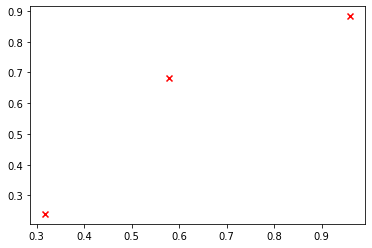

In [104]:
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')

In [105]:
model.labels_

array([1, 2, 2, ..., 2, 2, 2], dtype=int32)

In [106]:
df_fin.set_index('CUS_CUST_ID', inplace = True)

In [107]:
print(model.cluster_centers_)

[[ 5.79383886e-01  6.83056872e-01  2.99170616e-01  8.60189573e-01
   1.77725118e-03  9.85781991e-01  4.87559242e-01  4.99407583e-01
   5.04146919e-01  1.72985782e-01  3.02725118e-01  1.00000000e+00
   9.97630332e-01  1.30331754e-02  1.24407583e-02]
 [ 3.18064516e-01  2.40000000e-01  1.31612903e-01  1.18064516e-01
   3.44169138e-15  1.03225806e-02  8.77419355e-02  6.19354839e-02
   7.74193548e-03  7.80645161e-02  1.19354839e-01  3.76129032e-01
   1.95483871e-01  8.50322581e-01  9.89677419e-01]
 [ 9.59010601e-01  8.82921084e-01  5.35453475e-01  9.92932862e-01
   9.99057715e-01  2.16493490e-15  9.91048292e-01  8.95170789e-03
   9.49116608e-01  1.71967020e-02  3.29799764e-02  1.00000000e+00
   1.00000000e+00 -1.69309011e-15  9.42285041e-04]]


## Graficos de la Clusterizacion

### gmv_not_refund vs tpv_approved

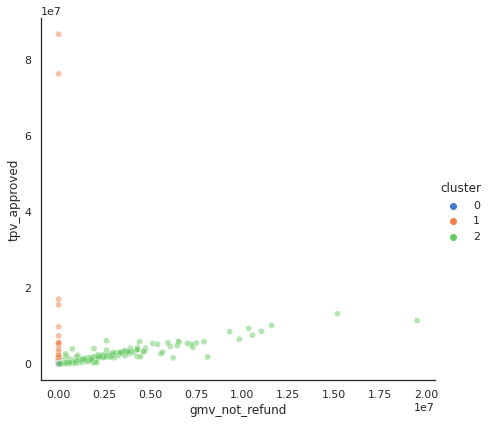

In [108]:
sns.set_theme(style="white")
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="gmv_not_refund", y="tpv_approved", hue="cluster",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_fin)

### count_orders vs count_claims_seller

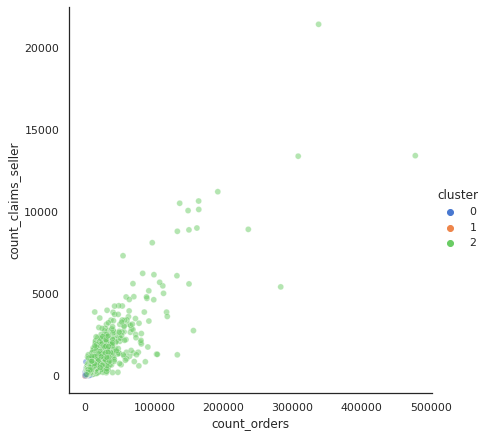

In [109]:
import seaborn as sns
sns.set_theme(style="white")
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="count_orders", y="count_claims_seller", hue="cluster",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_fin)

### count_orders vs tpv_approved

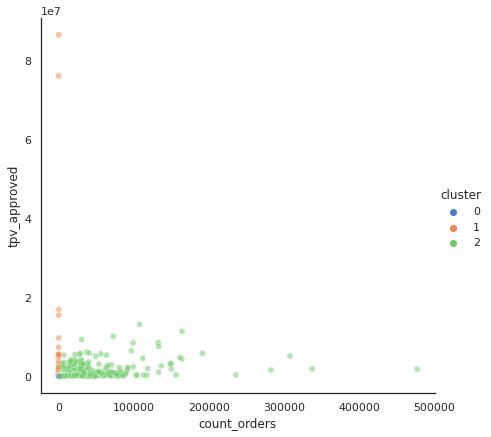

In [110]:
sns.set_theme(style="white")
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="count_orders", y="tpv_approved", hue="cluster",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_fin)

### flag_on_final vs tpv_approved

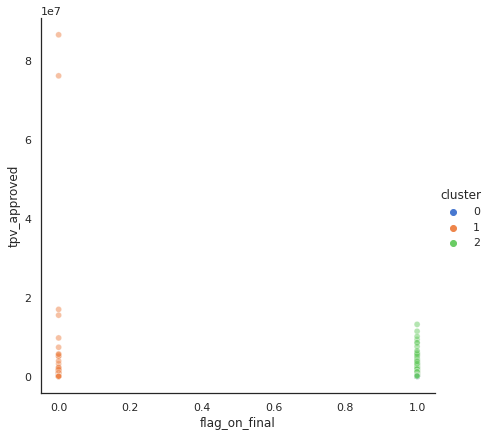

In [111]:
import seaborn as sns
sns.set_theme(style="white")
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="flag_on_final", y="tpv_approved", hue="cluster",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_fin)

### count_orders vs count_claims_seller vs flag_on_final

No handles with labels found to put in legend.


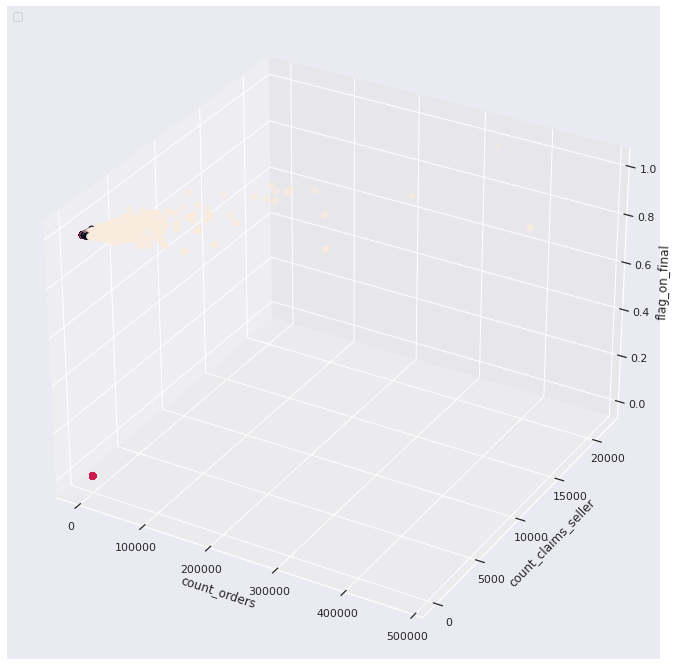

In [112]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111, projection = '3d')

x = df_fin['count_orders']
y = df_fin['count_claims_seller']
z = df_fin['flag_on_final']

ax.set_xlabel("count_orders")
ax.set_ylabel("count_claims_seller")
ax.set_zlabel("flag_on_final")
ax.scatter(x, y, z,marker = 'o', c=df_fin["cluster"],s = 40)

plt.legend(loc=2)
plt.show()

## Analisis Dentro de los Clusters

In [113]:
df_0=df_fin[df_fin['cluster']==0]
df_1=df_fin[df_fin['cluster']==1]
df_2=df_fin[df_fin['cluster']==2]

In [114]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1550 entries, 201114848 to 171271537
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   registration_date    1550 non-null   object 
 1   sit_site_id          1550 non-null   object 
 2   cus_nickname         1550 non-null   object 
 3   flag_ca              1550 non-null   float64
 4   flag_mia             1550 non-null   float64
 5   flag_up              1550 non-null   float64
 6   flag_trusted_seller  1550 non-null   float64
 7   flag_gmv_high        1550 non-null   float64
 8   flag_gmv_low         1550 non-null   float64
 9   flag_tpv_high        1550 non-null   float64
 10  flag_tpv_low         1550 non-null   float64
 11  flag_repu_ml         1550 non-null   float64
 12  flag_repu_glg        1550 non-null   float64
 13  flag_repu_yor        1550 non-null   float64
 14  last_transaction     1550 non-null   object 
 15  tpv_approved         1550

In [115]:
df_1.tpv_approved = df_1['tpv_approved'].astype(int)
df_1.gmv_not_refund = df_1['gmv_not_refund'].astype(int)
df_1.cashout = df_1['cashout'].astype(int)
df_1.gmv_not_refund = df_1['gmv_not_refund'].astype(int)


/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [116]:
df_1.to_csv('cluster1.csv')

### Tamaño de los clusters

In [117]:
df_0.shape

(1688, 26)

In [118]:
df_1.shape

(1550, 26)

In [119]:
df_2.shape

(4245, 26)

### Distribucion usuarios del ON

In [120]:
df_fin['flag_on_final'].value_counts()

1    6516
0     967
Name: flag_on_final, dtype: int64

In [121]:
Activos_ON = df_fin.groupby(['cluster','flag_on_final']).size()
Activos_ON = Activos_ON.reset_index()
Activos_ON = pd.pivot_table(Activos_ON,columns='flag_on_final',index='cluster',values=0)
Activos_ON.fillna(0, inplace=True)
Activos_ON

flag_on_final,0,1
cluster,,
0,0.0,1688.0
1,967.0,583.0
2,0.0,4245.0


 *Tenemos aproximadamente 6500 usuarios que operan en el ON.*
 *En el cluster 0 y 2 tenemos users unicamente del ON mientras que en el cluster 1 tenemos un mix.*

### Distribucion usuarios activos

In [122]:
df_fin['activo'].value_counts()

1    6232
0    1251
Name: activo, dtype: int64

In [123]:
Activos = df_fin.groupby(['cluster','activo']).size()
Activos = Activos.reset_index()
Activos = pd.pivot_table(Activos,columns='activo',index='cluster',values=0)
Activos.fillna(0, inplace=True)
Activos

activo,0,1
cluster,,
0,4.0,1684.0
1,1247.0,303.0
2,0.0,4245.0


 *Tenemos 1251 usuarios sin actividad en los ultimos 90 días.*
 *Con 1247 users, en el cluster 2 se encuentran el 99% de los usuarios sin actividad. En el cluster 1 tenemos 4 users y en el 2 ninguno.*

### Distribucion cartera asesorada

In [124]:
df_fin['flag_ca'].value_counts()

1.0    5542
0.0    1941
Name: flag_ca, dtype: int64

In [125]:
CA = df_fin.groupby(['cluster','flag_ca']).size()
CA = CA.reset_index()
CA = pd.pivot_table(CA,columns='flag_ca',index='cluster',values=0)
CA.fillna(0, inplace=True)
CA

flag_ca,0.0,1.0
cluster,,
0,710,978
1,1057,493
2,174,4071


 *Tenemos aproximadamente 5500 usuarios con cartera asesorada en WL*
 *Con 4071 users, en el cluster 2 se encuentra el 73% de los usuarios con CA.*

### Distribucion users con adelantos

In [126]:
df_fin['flag_mia'].value_counts()

1.0    5273
0.0    2210
Name: flag_mia, dtype: int64

In [127]:
Adelantos = df_fin.groupby(['cluster','flag_mia']).size()
Adelantos = Adelantos.reset_index()
Adelantos = pd.pivot_table(Adelantos,columns='flag_mia',index='cluster',values=0)
Adelantos.fillna(0, inplace=True)
Adelantos

flag_mia,0.0,1.0
cluster,,
0,535,1153
1,1178,372
2,497,3748


 *Tenemos aproximadamente 5300 usuarios con adelantos activoss en WL*
 *Con 3748 users, en el cluster 2 se encuentra el 71% de los usuarios con adelantos. El resto se distribuye en partes similares dentro de los otros dos clusters*

### Distribucion UP

In [128]:
df_fin['flag_up'].value_counts()

0.0    4501
1.0    2982
Name: flag_up, dtype: int64

In [129]:
UP = df_fin.groupby(['cluster','flag_up']).size()
UP = UP.reset_index()
UP = pd.pivot_table(UP,columns='flag_up',index='cluster',values=0)
UP.fillna(0, inplace=True)
UP

flag_up,0.0,1.0
cluster,,
0,1183,505
1,1346,204
2,1972,2273


 *Tenemos aproximadamente 3000 usuarios con tag UP dentro de la WL*
 *Con 2273 users, en el cluster 2 se encuentra el 76% de los usuarios con UP. El resto se distribuye en partes iguales dentro de los otros dos clusters*

### Distribucion TPV High

In [130]:
df_fin['flag_tpv_high'].value_counts()

1.0    5166
0.0    2317
Name: flag_tpv_high, dtype: int64

In [131]:
TPV = df_fin.groupby(['cluster','flag_tpv_high']).size()
TPV = TPV.reset_index()
TPV = pd.pivot_table(TPV,columns='flag_tpv_high',index='cluster',values=0)
TPV.fillna(0, inplace=True)
TPV

flag_tpv_high,0.0,1.0
cluster,,
0,865,823
1,1414,136
2,38,4207


 *Tenemos aproximadamente 5150 usuarios con TPV HIGH dentro de la WL*
 *Con 4207 users, en el cluster 2 se encuentra el 81% de los usuarios con TPV HIGH.*

### Distribucion GMV High

In [132]:
df_fin['flag_gmv_high'].value_counts()

1.0    4244
0.0    3239
Name: flag_gmv_high, dtype: int64

In [133]:
GMV = df_fin.groupby(['cluster','flag_gmv_high']).size()
GMV = GMV.reset_index()
GMV = pd.pivot_table(GMV,columns='flag_gmv_high',index='cluster',values=0)
GMV.fillna(0, inplace=True)
GMV

flag_gmv_high,0.0,1.0
cluster,,
0,1685.0,3.0
1,1550.0,0.0
2,4.0,4241.0


 *Tenemos aproximadamente 4250 usuarios con GMV HIGH dentro de la WL*
 *Con 4241 users, en el cluster 2 se encuentra el 99% de los usuarios con GMV HIGH.*

### Distribucion Trusted Sellers

In [134]:
df_fin['flag_trusted_seller'].value_counts()

1.0    5850
0.0    1633
Name: flag_trusted_seller, dtype: int64

In [135]:
Trusted = df_fin.groupby(['cluster','flag_trusted_seller']).size()
Trusted = Trusted.reset_index()
Trusted = pd.pivot_table(Trusted,columns='flag_trusted_seller',index='cluster',values=0)
Trusted.fillna(0, inplace=True)
Trusted

flag_trusted_seller,0.0,1.0
cluster,,
0,236,1452
1,1367,183
2,30,4215


 *Tenemos 5850 Trusted Sellers dentro de la WL*
 *Con 4215 users, en el cluster 2 se encuentra el 72% de los usuarios con Trusted Sellers.*
 *El 99% de los users en el cluster 2 son Trusted Sellers*

## Concluciones

### Cluster 0: 
 *Este cluster cuenta con 1688 usuarios los cuales son unicamente del ON y practicamente todos ACTIVOS en los ultimos 90 días. En este cluster se enceuntran gran parte de los usuarios untrusted con TPV y GMV low o null. La mayrorai de estos users no son UP pero si tienen ADELANTOS activos.
Este cluster cuenta con los usuarios activos del ON mas chicos de la WL.*

### Cluster 1: 
*Este cluster cuenta con 1550 usuarios que son un mix entre ON y OFF. Gran parte de estos usarios estan INACTIVOS en los ultimos 90 días. En este cluster tenemos mayoria de usuarios UNTRUSTED con TPV y GMV low o null. La mayrorai de estos users no son UP ni tienen ADELANTOS activos.
El cluster 1 cuenta con la "basura" dentro de la WL ya que aca estan todos los usuarios inactivos.*

### Cluster 2: 
*Este cluster cuenta con 4245 usuarios los cuales son unicamente del ON y todos ACTIVOS en los ultimos 90 días. En este cluster practicamente todos los usuarios son TRUSTED con TPV y GMV high. Gran parte de los UP se encuentran dentro de este cluster y muchos de ellos tienen ADELANTOS activos.
El cluster 2 cuenta con los usuarios activos del ON mas grandes y con mayor confianza nuestra dentro de la WL. En este cluster tenemos a los mejores usuarios.*

### Cluster 3: 
*Este cluster cuenta con 886 usuarios. Aqui tenemos las exepciones de usuarios internos, test y que se encuentran en la lista de legales.*

## Sub Clusterizacion Cluster 0

### Despliego lo datos del DF 0

In [136]:
df_0.shape

(1688, 26)

In [137]:
df_0.head(5)

,registration_date,sit_site_id,cus_nickname,flag_ca,flag_mia,flag_up,flag_trusted_seller,flag_gmv_high,flag_gmv_low,flag_tpv_high,...,gmv_not_refund,count_orders,cashout,gmv_claims_seller,count_claims_seller,flag_on_final,activo,tpv_nulo,gmv_nulo,cluster
CUS_CUST_ID,,,,,,,,,,,,,,,,,,,,,
45790119,2008-02-27,MCO,DIAGNOSTIQ MEDICAL,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,12110.48,239.0,100.65,314.09,5.0,1,1,0,0,0
244903188,2017-02-22,MLB,GMCICAL,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,599.45,16.0,0.00,109.60,1.0,1,1,0,0,0
102979606,2012-02-16,MCO,DIGISMART.CO,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,367.08,32.0,0.00,14.23,2.0,1,1,0,0,0
167086628,2015-01-14,MLB,YASMIN BAZAR,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,10365.96,650.0,0.00,899.52,48.0,1,1,0,0,0
264717561,2017-07-17,MLM,BOOLCHANDSMX,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,9523.78,62.0,208.86,3442.50,13.0,1,1,0,0,0


In [138]:
df_0.columns

Index(['registration_date', 'sit_site_id', 'cus_nickname', 'flag_ca',
       'flag_mia', 'flag_up', 'flag_trusted_seller', 'flag_gmv_high',
       'flag_gmv_low', 'flag_tpv_high', 'flag_tpv_low', 'flag_repu_ml',
       'flag_repu_glg', 'flag_repu_yor', 'last_transaction', 'tpv_approved',
       'gmv_not_refund', 'count_orders', 'cashout', 'gmv_claims_seller',
       'count_claims_seller', 'flag_on_final', 'activo', 'tpv_nulo',
       'gmv_nulo', 'cluster'],
      dtype='object')

### Dropeo las columnas que no van para el analisis

In [139]:
df_sub0=df_0.drop(columns=['registration_date','sit_site_id','cus_nickname','last_transaction','tpv_approved','gmv_not_refund','count_orders','cashout','gmv_claims_seller','count_claims_seller','cluster'])


In [140]:
df_sub0.columns

Index(['flag_ca', 'flag_mia', 'flag_up', 'flag_trusted_seller',
       'flag_gmv_high', 'flag_gmv_low', 'flag_tpv_high', 'flag_tpv_low',
       'flag_repu_ml', 'flag_repu_glg', 'flag_repu_yor', 'flag_on_final',
       'activo', 'tpv_nulo', 'gmv_nulo'],
      dtype='object')

## Sub Clustering

### Buscamos la cantidad de clusters a implementar

In [141]:
from kmodes.kmodes import KModes

Text(0.5, 0, 'Cantidad de clusters')

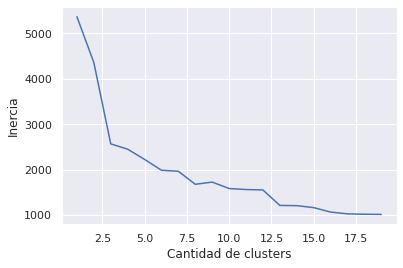

In [142]:
inercias = []
for i in range(1, 20):
    kmodes = KModes(n_clusters=i).fit(df_sub0)
    inercias.append(kmodes.cost_)
plt.plot(range(1, 20), inercias)
plt.ylabel('Inercia')
plt.xlabel('Cantidad de clusters')

### Creamos los sub clusters 0

In [143]:
X = df_sub0.values
X = np.nan_to_num(X)

sc = StandardScaler()

cluster_data = sc.fit_transform(X)
print('Cluster data samples : ', cluster_data[:3])

Cluster data samples :  [[ 0.85203954  0.68118055  1.53054705  0.4031556  -0.04219497  0.12009612
  -0.97542047  1.00118554  0.99174027 -0.45735003 -0.65890411  0.
   0.04873702 -0.11491424 -0.1122385 ]
 [ 0.85203954 -1.46803957 -0.65336116  0.4031556  -0.04219497  0.12009612
  -0.97542047  1.00118554 -1.00832852 -0.45735003  1.51767151  0.
   0.04873702 -0.11491424 -0.1122385 ]
 [-1.17365446  0.68118055 -0.65336116  0.4031556  -0.04219497  0.12009612
  -0.97542047  1.00118554 -1.00832852 -0.45735003  1.51767151  0.
   0.04873702 -0.11491424 -0.1122385 ]]


In [144]:
clusters = 4
model = KMeans(init = 'k-means++', 
               n_clusters = clusters, 
               n_init = 12)
model.fit(X)

labels = model.labels_
print(labels[:100])

[3 2 2 1 3 1 2 3 0 1 0 2 0 1 3 1 1 2 1 1 2 1 2 0 3 1 1 3 1 2 2 1 1 1 1 3 1
 1 1 1 2 0 1 3 0 0 0 0 2 1 3 3 3 2 1 0 1 1 2 3 1 0 3 2 1 0 1 1 1 1 2 1 0 2
 1 1 3 2 1 1 2 1 0 2 2 1 1 2 2 0 3 2 3 3 1 0 1 3 0 2]


### Asignamos los sub clusters al DF 0

In [145]:
df_sub0['sub_cluster']=labels

In [146]:
df_sub0.shape

(1688, 16)

In [147]:
df_sub0 = df_sub0.reset_index()

In [148]:
columns = ['CUS_CUST_ID','sub_cluster']

In [149]:
df_sub_bis0 = df_sub0[columns]

In [150]:
df_sub0_fin=pd.merge(left = df_0, right = df_sub_bis0,
                  how = 'left',
                  left_on='CUS_CUST_ID', right_on='CUS_CUST_ID')

### Despliego la data del cluster 0 ya reclusterizada

In [151]:
df_sub0_fin.head(5)

,CUS_CUST_ID,registration_date,sit_site_id,cus_nickname,flag_ca,flag_mia,flag_up,flag_trusted_seller,flag_gmv_high,flag_gmv_low,...,count_orders,cashout,gmv_claims_seller,count_claims_seller,flag_on_final,activo,tpv_nulo,gmv_nulo,cluster,sub_cluster
0,45790119,2008-02-27,MCO,DIAGNOSTIQ MEDICAL,1.0,1.0,1.0,1.0,0.0,1.0,...,239.0,100.65,314.09,5.0,1,1,0,0,0,3
1,244903188,2017-02-22,MLB,GMCICAL,1.0,0.0,0.0,1.0,0.0,1.0,...,16.0,0.00,109.60,1.0,1,1,0,0,0,2
2,102979606,2012-02-16,MCO,DIGISMART.CO,0.0,1.0,0.0,1.0,0.0,1.0,...,32.0,0.00,14.23,2.0,1,1,0,0,0,2
3,167086628,2015-01-14,MLB,YASMIN BAZAR,0.0,1.0,0.0,1.0,0.0,1.0,...,650.0,0.00,899.52,48.0,1,1,0,0,0,1
4,264717561,2017-07-17,MLM,BOOLCHANDSMX,1.0,0.0,0.0,1.0,0.0,1.0,...,62.0,208.86,3442.50,13.0,1,1,0,0,0,3


In [152]:
df_sub0_fin.columns

Index(['CUS_CUST_ID', 'registration_date', 'sit_site_id', 'cus_nickname',
       'flag_ca', 'flag_mia', 'flag_up', 'flag_trusted_seller',
       'flag_gmv_high', 'flag_gmv_low', 'flag_tpv_high', 'flag_tpv_low',
       'flag_repu_ml', 'flag_repu_glg', 'flag_repu_yor', 'last_transaction',
       'tpv_approved', 'gmv_not_refund', 'count_orders', 'cashout',
       'gmv_claims_seller', 'count_claims_seller', 'flag_on_final', 'activo',
       'tpv_nulo', 'gmv_nulo', 'cluster', 'sub_cluster'],
      dtype='object')

### Grafico los centroides

In [153]:
centers = np.array(model.cluster_centers_)

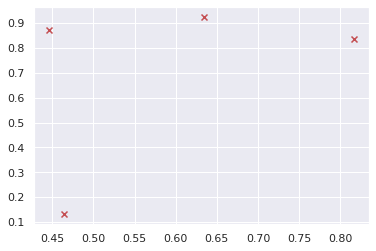

In [154]:
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')

In [155]:
model.labels_

array([3, 2, 2, ..., 2, 3, 1], dtype=int32)

In [156]:
df_sub0_fin.set_index('CUS_CUST_ID', inplace = True)

In [157]:
print(model.cluster_centers_)

[[ 4.46254072e-01  8.72964169e-01  1.92182410e-01  8.56677524e-01
   3.25732899e-03  9.54397394e-01  2.41042345e-01  7.39413681e-01
   7.77156117e-16  9.51140065e-01  1.66533454e-16  1.00000000e+00
   9.93485342e-01  1.95439739e-02  4.23452769e-02]
 [ 6.33781764e-01  9.25261584e-01  4.21524664e-01  9.92526158e-01
  -3.46944695e-18  9.89536622e-01  1.00000000e+00 -2.22044605e-16
   9.10313901e-01 -2.49800181e-16  8.37070254e-02  1.00000000e+00
   1.00000000e+00  1.73472348e-18  1.04633782e-02]
 [ 4.64668094e-01  1.30620985e-01  2.01284797e-01  6.10278373e-01
   4.28265525e-03  9.93576017e-01  1.71306210e-01  7.94432548e-01
   8.88178420e-16 -2.49800181e-16  9.74304069e-01  1.00000000e+00
   9.95717345e-01  3.42612420e-02  2.14132762e-03]
 [ 8.16326531e-01  8.36734694e-01  2.85714286e-01  9.79591837e-01
  -1.73472348e-18  1.00000000e+00 -2.22044605e-16  1.00000000e+00
   9.87755102e-01  1.94289029e-16  1.66533454e-16  1.00000000e+00
   1.00000000e+00  0.00000000e+00  1.38777878e-17]]


## Analisis Dentro de los Sub Clusters 0

In [188]:
df_s0=df_sub0_fin[df_sub0_fin['sub_cluster']==0]
df_s1=df_sub0_fin[df_sub0_fin['sub_cluster']==1]
df_s2=df_sub0_fin[df_sub0_fin['sub_cluster']==2]
df_s3=df_sub0_fin[df_sub0_fin['sub_cluster']==3]

### Tamaño de los clusters

In [189]:
df_sub0_fin['sub_cluster'].value_counts()

1    669
2    467
0    307
3    245
Name: sub_cluster, dtype: int64

### Distribucion Activos

In [160]:
df_sub0_fin['activo'].value_counts()

1    1684
0       4
Name: activo, dtype: int64

In [161]:
sub0 = df_sub0_fin.groupby(['sub_cluster','activo']).size()
sub0 = sub0.reset_index()
sub0 = pd.pivot_table(sub0,columns='activo',index='sub_cluster',values=0)
sub0.fillna(0, inplace=True)
sub0

activo,0,1
sub_cluster,,
0,2.0,305.0
1,0.0,669.0
2,2.0,465.0
3,0.0,245.0


*Tenemos solo 4 usuarios sin actividad en los ultimos 90 dias. Dos de ellos estan en el sub cluster 0 y otros dos en el sub cluster 1*

### Distribucion Trusted Sellers

In [162]:
df_sub0_fin['flag_trusted_seller'].value_counts()

1.0    1452
0.0     236
Name: flag_trusted_seller, dtype: int64

In [164]:
sub0 = df_sub0_fin.groupby(['sub_cluster','flag_trusted_seller']).size()
sub0 = sub0.reset_index()
sub0 = pd.pivot_table(sub0,columns='flag_trusted_seller',index='sub_cluster',values=0)
sub0.fillna(0, inplace=True)
sub0

flag_trusted_seller,0.0,1.0
sub_cluster,,
0,44,263
1,5,664
2,182,285
3,5,240


*Los sub cluster 2 y 3 contienen practicamente solo tusted sellers*

### Distribucion UP

In [165]:
df_sub0_fin['flag_up'].value_counts()

0.0    1183
1.0     505
Name: flag_up, dtype: int64

In [166]:
sub0 = df_sub0_fin.groupby(['sub_cluster','flag_up']).size()
sub0 = sub0.reset_index()
sub0 = pd.pivot_table(sub0,columns='flag_up',index='sub_cluster',values=0)
sub0.fillna(0, inplace=True)
sub0

flag_up,0.0,1.0
sub_cluster,,
0,248,59
1,387,282
2,373,94
3,175,70


*En el sub cluster 2 se encuentran mas de la mnitad de los sellers con tag UP*

### Distribucion CA

In [167]:
df_sub0_fin['flag_ca'].value_counts()

1.0    978
0.0    710
Name: flag_ca, dtype: int64

In [168]:
sub0 = df_sub0_fin.groupby(['sub_cluster','flag_ca']).size()
sub0 = sub0.reset_index()
sub0 = pd.pivot_table(sub0,columns='flag_ca',index='sub_cluster',values=0)
sub0.fillna(0, inplace=True)
sub0

flag_ca,0.0,1.0
sub_cluster,,
0,170,137
1,245,424
2,250,217
3,45,200


### Distribucion Adelantos

In [169]:
df_sub0_fin['flag_mia'].value_counts()

1.0    1153
0.0     535
Name: flag_mia, dtype: int64

In [170]:
sub0 = df_sub0_fin.groupby(['sub_cluster','flag_mia']).size()
sub0 = sub0.reset_index()
sub0 = pd.pivot_table(sub0,columns='flag_mia',index='sub_cluster',values=0)
sub0.fillna(0, inplace=True)
sub0

flag_mia,0.0,1.0
sub_cluster,,
0,39,268
1,50,619
2,406,61
3,40,205


### Distribucion TPV High

In [171]:
df_sub0_fin['flag_tpv_high'].value_counts()

0.0    865
1.0    823
Name: flag_tpv_high, dtype: int64

In [172]:
sub0 = df_sub0_fin.groupby(['sub_cluster','flag_tpv_high']).size()
sub0 = sub0.reset_index()
sub0 = pd.pivot_table(sub0,columns='flag_tpv_high',index='sub_cluster',values=0)
sub0.fillna(0, inplace=True)
sub0

flag_tpv_high,0.0,1.0
sub_cluster,,
0,233.0,74.0
1,0.0,669.0
2,387.0,80.0
3,245.0,0.0


*El 100% de los users del sub cluster 2 son de TPV HIGH.*

### Distribucion GMV High

In [173]:
df_sub0_fin['flag_gmv_high'].value_counts()

0.0    1685
1.0       3
Name: flag_gmv_high, dtype: int64

In [174]:
sub0 = df_sub0_fin.groupby(['sub_cluster','flag_gmv_high']).size()
sub0 = sub0.reset_index()
sub0 = pd.pivot_table(sub0,columns='flag_gmv_high',index='sub_cluster',values=0)
sub0.fillna(0, inplace=True)
sub0

flag_gmv_high,0.0,1.0
sub_cluster,,
0,306.0,1.0
1,669.0,0.0
2,465.0,2.0
3,245.0,0.0


*Practicamente tdoos son de GMV Low, esto nos indica que en el cluster 0 los users son que tenemos son chicos dentro del ON*
*Auneque todos son de GMV Low, muchos de los sellers son de TPV High. Esto nos quiere decir que muchos de estos usuarios aunque no sean grandes en el ON si lo son para el OFF*

### Comportamiento GMV y Cashout

#### Cashout

In [175]:
gra = df_sub0_fin[['sub_cluster','cashout']].groupby('sub_cluster').mean()
gra

,cashout
sub_cluster,
0,16.045277
1,120.739776
2,33.311306
3,76.898367


<AxesSubplot:title={'center':'Media CashOut'}, xlabel='sub_cluster'>

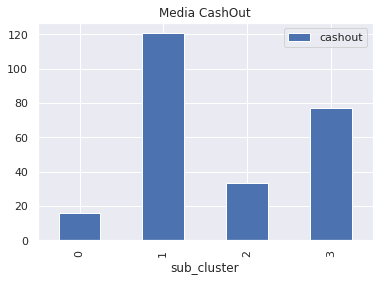

In [176]:
gra.plot(kind = 'bar',
            title = 'Media CashOut')

#### GMV

In [177]:
gra = df_sub0_fin[['sub_cluster','gmv_not_refund']].groupby('sub_cluster').mean()
gra

,gmv_not_refund
sub_cluster,
0,4921.021987
1,34545.612466
2,6834.708822
3,14149.900857


<AxesSubplot:title={'center':'Media GMV'}, xlabel='sub_cluster'>

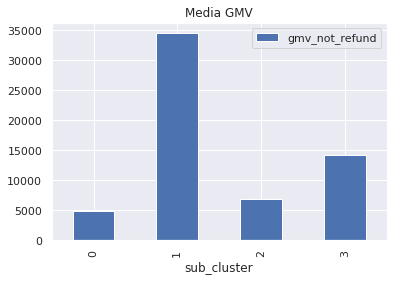

In [178]:
gra.plot(kind = 'bar',
            title = 'Media GMV')

#### Ratio CO / GMV

In [179]:
gra = df_sub0_fin[['sub_cluster','gmv_not_refund','cashout']].groupby('sub_cluster').sum()
gra

,gmv_not_refund,cashout
sub_cluster,,
0,1510753.75,4925.90
1,23111014.74,80774.91
2,3191809.02,15556.38
3,3466725.71,18840.10


In [180]:
gra['ratio'] = (gra['cashout']/gra['gmv_not_refund'])*100
gra

,gmv_not_refund,cashout,ratio
sub_cluster,,,
0,1510753.75,4925.90,0.326056
1,23111014.74,80774.91,0.349508
2,3191809.02,15556.38,0.487384
3,3466725.71,18840.10,0.543455


## Concluciones Sub Clustering 0
#### Sub Cluster 0:
*Con 307 usuarios, en este sub cluster tenemos un 83% de trusted sellers. Aqui no tenemos usuarios con GMV high pero si el 19% tiene TPV high. En este sub cluster tenemos un 14% de usuarios UP pero un 88% de usuarios con adelantos. Este sub cluster cuenta con los seller con menos ratio de CO/GMV. En este sub cluster tenemos los trusted sellers chicos mas lindos.*
#### Sub Cluster 1:
*En este sub cluster tenemos 669 usuarios de los cuales practicamente todos son trusted sellers. En este cluster todos los selles son de GMV low pero de TPV high. Solo el 44% de ellos son UPs pero el 92% tienen adelantos activos. Aqui tenemos 424 usuarios que pertenecen a la cartera asesorada. Este sub cluster tiene los mejores usuarios del cluster 0 los cuales a pesar de no ser grandes en el ON si lo son en el OFF.*
#### Sub Cluster 2:
*Este sub cluster cuenta con 467 usuarios de los cuales solo el 61% de ellos son trusted sellers. Aqui todos los usuarios son de GMV low y pocos de ellos tiene TPV high. Solo el 20% de los usuarios son UPs y el 13% tiene adelantos acticvos. Menos de la mitada de estos usuarios son asesorados.
En este sub cluster se encuentran los peores uisuarios del clsuter 0*
#### Sub Cluster 3:
*Este sub cluster cuenta con 245 usuarios de los cuales practicamente todos son trusted sellers. Los usuarios de este sub cluster estan todos activos pero son de TPV y GMV low. Solo el 29% de los usuarios son UPs pero el 84% de ellos tienen activos los adelantos. En este sub cluster el 81% de los usuarios pertenecen a la cartera asesorada. Aqui tenemos el clsuter con mayor ratio de CO/GMV.
Este sub cluster cuenta con los usuarios trusted sellers mas grises.*

## ---------------------------------------------------------------------------

## Sub Clusterizacion Cluster 2

### Despliego lo datos del DF 2

In [173]:
df_2.shape

(1550, 26)

In [174]:
df_2.head(5)

,registration_date,sit_site_id,cus_nickname,flag_ca,flag_mia,flag_up,flag_trusted_seller,flag_gmv_high,flag_gmv_low,flag_tpv_high,...,gmv_not_refund,count_orders,cashout,gmv_claims_seller,count_claims_seller,flag_on_final,activo,tpv_nulo,gmv_nulo,cluster
CUS_CUST_ID,,,,,,,,,,,,,,,,,,,,,
201114848,2015-12-16,MCO,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,1,2
275132089,2017-09-26,MLB,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,1,2
677370581,2020-11-24,MLB,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,1,2
82251427,2005-06-30,MCO,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,1,2
261630957,2017-06-22,MLM,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,1,2


In [175]:
df_1.columns

Index(['registration_date', 'sit_site_id', 'cus_nickname', 'flag_ca',
       'flag_mia', 'flag_up', 'flag_trusted_seller', 'flag_gmv_high',
       'flag_gmv_low', 'flag_tpv_high', 'flag_tpv_low', 'flag_repu_ml',
       'flag_repu_glg', 'flag_repu_yor', 'last_transaction', 'tpv_approved',
       'gmv_not_refund', 'count_orders', 'cashout', 'gmv_claims_seller',
       'count_claims_seller', 'flag_on_final', 'activo', 'tpv_nulo',
       'gmv_nulo', 'cluster'],
      dtype='object')

### Dropeo las columnas que no van para el analisis

In [176]:
df_sub2=df_2.drop(columns=['registration_date','sit_site_id','cus_nickname','last_transaction','tpv_approved','gmv_not_refund','count_orders','cashout','gmv_claims_seller','count_claims_seller','cluster'])


In [177]:
df_sub2.columns

Index(['flag_ca', 'flag_mia', 'flag_up', 'flag_trusted_seller',
       'flag_gmv_high', 'flag_gmv_low', 'flag_tpv_high', 'flag_tpv_low',
       'flag_repu_ml', 'flag_repu_glg', 'flag_repu_yor', 'flag_on_final',
       'activo', 'tpv_nulo', 'gmv_nulo'],
      dtype='object')

## Sub Clustering

### Buscamos la cantidad de clusters a implementar

In [178]:
from kmodes.kmodes import KModes

Text(0.5, 0, 'Cantidad de clusters')

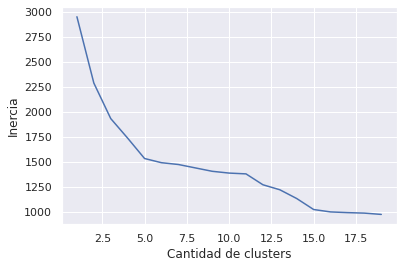

In [179]:
inercias = []
for i in range(1, 20):
    kmodes = KModes(n_clusters=i).fit(df_sub2)
    inercias.append(kmodes.cost_)
plt.plot(range(1, 20), inercias)
plt.ylabel('Inercia')
plt.xlabel('Cantidad de clusters')

### Creamos los sub clusters 1

In [180]:
X = df_sub2.values
X = np.nan_to_num(X)

sc = StandardScaler()

cluster_data = sc.fit_transform(X)
print('Cluster data samples : ', cluster_data[:3])

Cluster data samples :  [[-0.68294537 -0.56195149  2.56866487 -0.3658822   0.         -0.10212858
  -0.31013069 -0.25695283 -0.08833086 -0.290989   -0.36814554 -0.77646349
  -0.49293322  0.41955247  0.10212858]
 [ 1.46424596 -0.56195149 -0.38930731 -0.3658822   0.         -0.10212858
  -0.31013069 -0.25695283 -0.08833086 -0.290989   -0.36814554 -0.77646349
  -0.49293322  0.41955247  0.10212858]
 [-0.68294537 -0.56195149 -0.38930731 -0.3658822   0.         -0.10212858
   3.22444706 -0.25695283 -0.08833086 -0.290989   -0.36814554 -0.77646349
   2.02867236 -2.38349208  0.10212858]]


In [181]:
clusters = 4
model = KMeans(init = 'k-means++', 
               n_clusters = clusters, 
               n_init = 12)
model.fit(X)

labels = model.labels_
print(labels[:100])

[2 1 0 2 1 2 3 1 3 3 3 0 2 1 3 0 1 3 1 3 1 2 0 2 1 2 2 1 2 1 3 3 2 2 2 0 3
 2 2 3 1 1 2 2 1 2 2 1 3 2 3 2 1 2 0 2 2 2 3 3 2 2 1 2 3 3 2 1 2 3 2 2 1 0
 1 3 2 3 2 1 1 0 1 1 2 2 1 2 2 1 0 2 2 2 2 3 1 2 3 2]


### Asignamos los sub clusters al DF 1

In [182]:
df_sub2['sub_cluster']=labels

In [183]:
df_sub2.shape

(1550, 16)

In [184]:
df_sub2 = df_sub2.reset_index()

In [185]:
columns = ['CUS_CUST_ID','sub_cluster']

In [186]:
df_sub2_bis = df_sub2[columns]

In [187]:
df_sub2_fin=pd.merge(left = df_2, right = df_sub2_bis,
                  how = 'left',
                  left_on='CUS_CUST_ID', right_on='CUS_CUST_ID')

### Despliego la data del cluster 1 ya reclusterizada

In [188]:
df_sub2_fin.head(5)

,CUS_CUST_ID,registration_date,sit_site_id,cus_nickname,flag_ca,flag_mia,flag_up,flag_trusted_seller,flag_gmv_high,flag_gmv_low,...,count_orders,cashout,gmv_claims_seller,count_claims_seller,flag_on_final,activo,tpv_nulo,gmv_nulo,cluster,sub_cluster
0,201114848,2015-12-16,MCO,0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,1,1,2,2
1,275132089,2017-09-26,MLB,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,1,1,2,1
2,677370581,2020-11-24,MLB,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,1,0,1,2,0
3,82251427,2005-06-30,MCO,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,1,1,2,2
4,261630957,2017-06-22,MLM,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,1,1,2,1


In [189]:
df_sub2_fin.columns

Index(['CUS_CUST_ID', 'registration_date', 'sit_site_id', 'cus_nickname',
       'flag_ca', 'flag_mia', 'flag_up', 'flag_trusted_seller',
       'flag_gmv_high', 'flag_gmv_low', 'flag_tpv_high', 'flag_tpv_low',
       'flag_repu_ml', 'flag_repu_glg', 'flag_repu_yor', 'last_transaction',
       'tpv_approved', 'gmv_not_refund', 'count_orders', 'cashout',
       'gmv_claims_seller', 'count_claims_seller', 'flag_on_final', 'activo',
       'tpv_nulo', 'gmv_nulo', 'cluster', 'sub_cluster'],
      dtype='object')

### Grafico los centroides

In [190]:
centers = np.array(model.cluster_centers_)

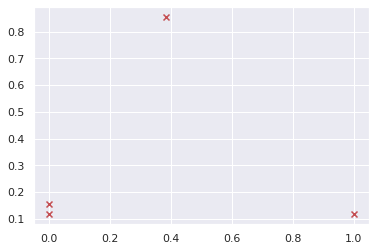

In [191]:
plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')

In [192]:
model.labels_

array([2, 1, 0, ..., 3, 0, 2], dtype=int32)

In [193]:
df_sub2_fin.set_index('CUS_CUST_ID', inplace = True)

In [194]:
print(model.cluster_centers_)

[[ 3.84279476e-01  8.55895197e-01  3.88646288e-01  0.00000000e+00
   0.00000000e+00 -1.21430643e-17  5.93886463e-01  4.06113537e-01
   0.00000000e+00  2.62008734e-02  3.05676856e-02  1.39737991e-01
   1.00000000e+00 -4.44089210e-16  1.00000000e+00]
 [ 1.00000000e+00  1.16049383e-01  8.88888889e-02  2.51851852e-01
   0.00000000e+00  9.87654321e-03 -9.71445147e-17  1.24900090e-16
   1.48148148e-02  1.06172840e-01  1.85185185e-01  4.96296296e-01
   5.18518519e-02  1.00000000e+00  9.90123457e-01]
 [-6.10622664e-16  1.55477032e-01  5.30035336e-02  4.71844785e-16
   0.00000000e+00  2.08166817e-17 -6.93889390e-17 -4.85722573e-17
  -6.07153217e-18 -4.16333634e-17  5.30035336e-03  7.21644966e-16
   1.23674912e-02  1.00000000e+00  1.00000000e+00]
 [ 2.77555756e-16  1.17142857e-01  1.40000000e-01  2.31428571e-01
   0.00000000e+00  3.42857143e-02 -8.32667268e-17  8.57142857e-03
   1.71428571e-02  2.05714286e-01  2.85714286e-01  1.00000000e+00
   1.31428571e-01  9.91428571e-01  9.65714286e-01]]


## Analisis Dentro de los Sub Clusters 2

### Tamaño de los sub clusters

In [195]:
df_sub2_fin['sub_cluster'].value_counts()

2    566
1    405
3    350
0    229
Name: sub_cluster, dtype: int64

### Distribucion Activos

In [196]:
df_sub2_fin['activo'].value_counts()

0    1247
1     303
Name: activo, dtype: int64

In [197]:
sub2 = df_sub2_fin.groupby(['sub_cluster','activo']).size()
sub2 = sub2.reset_index()
sub2 = pd.pivot_table(sub2,columns='activo',index='sub_cluster',values=0)
sub2.fillna(0, inplace=True)
sub2

activo,0,1
sub_cluster,,
0,0.0,229.0
1,384.0,21.0
2,559.0,7.0
3,304.0,46.0


<AxesSubplot:title={'center':'Suma Activos'}, xlabel='sub_cluster'>

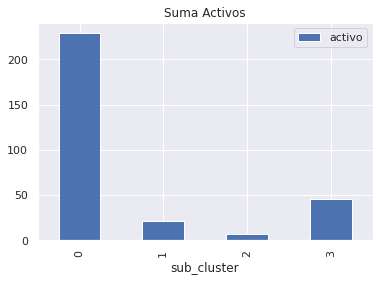

In [198]:
gra = df_sub2_fin[['sub_cluster','activo']].groupby('sub_cluster').sum()
gra.plot(kind = 'bar',
            title = 'Suma Activos')

### Distribucion ON

In [199]:
df_sub2_fin['flag_on_final'].value_counts()

0    967
1    583
Name: flag_on_final, dtype: int64

In [200]:
sub2 = df_sub2_fin.groupby(['sub_cluster','flag_on_final']).size()
sub2 = sub2.reset_index()
sub2 = pd.pivot_table(sub2,columns='flag_on_final',index='sub_cluster',values=0)
sub2.fillna(0, inplace=True)
sub2

flag_on_final,0,1
sub_cluster,,
0,197.0,32.0
1,204.0,201.0
2,566.0,0.0
3,0.0,350.0


<AxesSubplot:title={'center':'Suma ON'}, xlabel='sub_cluster'>

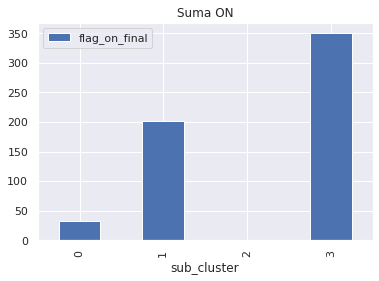

In [201]:
gra = df_sub2_fin[['sub_cluster','flag_on_final']].groupby('sub_cluster').sum()
gra.plot(kind = 'bar',
            title = 'Suma ON')

### Distribucion Trusted Sellers

In [202]:
df_sub2_fin['flag_trusted_seller'].value_counts()

0.0    1367
1.0     183
Name: flag_trusted_seller, dtype: int64

In [203]:
sub2 = df_sub2_fin.groupby(['sub_cluster','flag_trusted_seller']).size()
sub2 = sub2.reset_index()
sub2 = pd.pivot_table(sub2,columns='flag_trusted_seller',index='sub_cluster',values=0)
sub2.fillna(0, inplace=True)
sub2

flag_trusted_seller,0.0,1.0
sub_cluster,,
0,229.0,0.0
1,303.0,102.0
2,566.0,0.0
3,269.0,81.0


<AxesSubplot:title={'center':'Suma Trusted Sellers'}, xlabel='sub_cluster'>

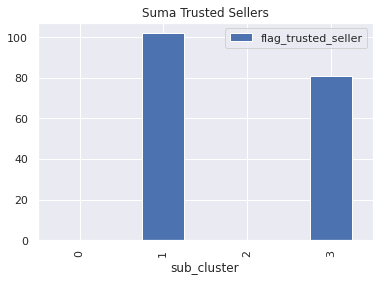

In [204]:
gra = df_sub2_fin[['sub_cluster','flag_trusted_seller']].groupby('sub_cluster').sum()
gra.plot(kind = 'bar',
            title = 'Suma Trusted Sellers')

### Distribucion UP

In [205]:
df_sub2_fin['flag_up'].value_counts()

0.0    1346
1.0     204
Name: flag_up, dtype: int64

In [206]:
sub2 = df_sub2_fin.groupby(['sub_cluster','flag_up']).size()
sub2 = sub2.reset_index()
sub2 = pd.pivot_table(sub2,columns='flag_up',index='sub_cluster',values=0)
sub2.fillna(0, inplace=True)
sub2

flag_up,0.0,1.0
sub_cluster,,
0,140,89
1,369,36
2,536,30
3,301,49


<AxesSubplot:title={'center':'Suma UPs'}, xlabel='sub_cluster'>

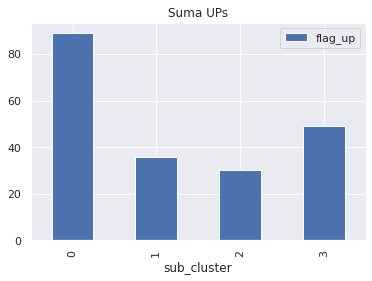

In [207]:
gra = df_sub2_fin[['sub_cluster','flag_up']].groupby('sub_cluster').sum()
gra.plot(kind = 'bar',
            title = 'Suma UPs')

### Distribucion Adelantos

In [208]:
df_sub2_fin['flag_mia'].value_counts()

0.0    1178
1.0     372
Name: flag_mia, dtype: int64

In [209]:
sub2 = df_sub2_fin.groupby(['sub_cluster','flag_mia']).size()
sub2 = sub2.reset_index()
sub2 = pd.pivot_table(sub2,columns='flag_mia',index='sub_cluster',values=0)
sub2.fillna(0, inplace=True)
sub2

flag_mia,0.0,1.0
sub_cluster,,
0,33,196
1,358,47
2,478,88
3,309,41


<AxesSubplot:title={'center':'Suma Adelantos'}, xlabel='sub_cluster'>

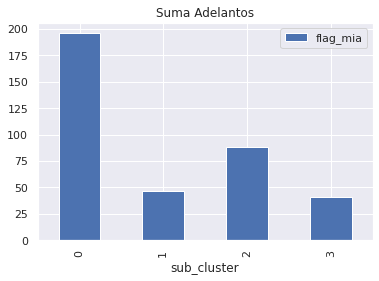

In [210]:
gra = df_sub2_fin[['sub_cluster','flag_mia']].groupby('sub_cluster').sum()
gra.plot(kind = 'bar',
            title = 'Suma Adelantos')

### Distribucion Cartera Asesorada

In [211]:
df_sub2_fin['flag_ca'].value_counts()

0.0    1057
1.0     493
Name: flag_ca, dtype: int64

In [212]:
sub2 = df_sub2_fin.groupby(['sub_cluster','flag_ca']).size()
sub2 = sub2.reset_index()
sub2 = pd.pivot_table(sub2,columns='flag_ca',index='sub_cluster',values=0)
sub2.fillna(0, inplace=True)
sub2

flag_ca,0.0,1.0
sub_cluster,,
0,141.0,88.0
1,0.0,405.0
2,566.0,0.0
3,350.0,0.0


<AxesSubplot:title={'center':'Suma CA'}, xlabel='sub_cluster'>

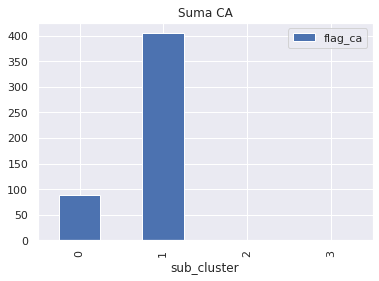

In [213]:
gra = df_sub2_fin[['sub_cluster','flag_ca']].groupby('sub_cluster').sum()
gra.plot(kind = 'bar',
            title = 'Suma CA')

### Distribucion TPV High

In [214]:
df_sub2_fin['flag_tpv_high'].value_counts()

0.0    1414
1.0     136
Name: flag_tpv_high, dtype: int64

In [215]:
sub2 = df_sub2_fin.groupby(['sub_cluster','flag_tpv_high']).size()
sub2 = sub2.reset_index()
sub2 = pd.pivot_table(sub2,columns='flag_tpv_high',index='sub_cluster',values=0)
sub2.fillna(0, inplace=True)
sub2

flag_tpv_high,0.0,1.0
sub_cluster,,
0,93.0,136.0
1,405.0,0.0
2,566.0,0.0
3,350.0,0.0


<AxesSubplot:title={'center':'Suma TPV High'}, xlabel='sub_cluster'>

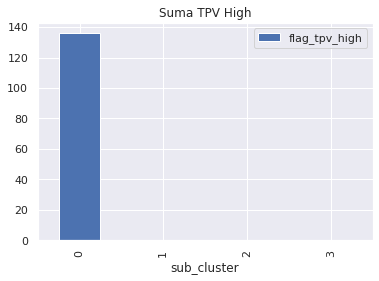

In [216]:
gra = df_sub2_fin[['sub_cluster','flag_tpv_high']].groupby('sub_cluster').sum()
gra.plot(kind = 'bar',
            title = 'Suma TPV High')

### Distribucion GMV High

In [217]:
df_sub2_fin['flag_gmv_high'].value_counts()

0.0    1550
Name: flag_gmv_high, dtype: int64

In [218]:
sub2 = df_sub2_fin.groupby(['sub_cluster','flag_gmv_high']).size()
sub2 = sub2.reset_index()
sub2 = pd.pivot_table(sub2,columns='flag_gmv_high',index='sub_cluster',values=0)
sub2.fillna(0, inplace=True)
sub2

flag_gmv_high,0.0
sub_cluster,
0,229
1,405
2,566
3,350


<AxesSubplot:title={'center':'Suma GMV High'}, xlabel='sub_cluster'>

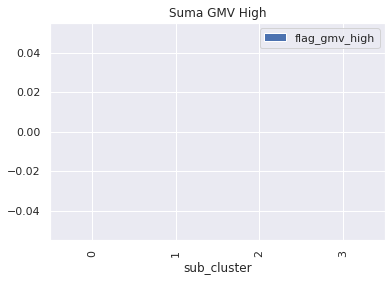

In [219]:
gra = df_sub2_fin[['sub_cluster','flag_gmv_high']].groupby('sub_cluster').sum()
gra.plot(kind = 'bar',
            title = 'Suma GMV High')

### Comportamiento GMV y Cashout

#### CashOut

In [220]:
gra = df_sub2_fin[['sub_cluster','cashout']].groupby('sub_cluster').mean()
gra

,cashout
sub_cluster,
0,0.000000
1,0.273432
2,0.000000
3,0.789029


<AxesSubplot:title={'center':'Media CashOut'}, xlabel='sub_cluster'>

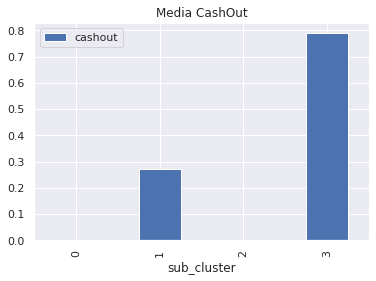

In [221]:
gra.plot(kind = 'bar',
            title = 'Media CashOut')

#### GMV

In [246]:
gra = df_sub2_fin[['sub_cluster','gmv_not_refund']].groupby('sub_cluster').mean()
gra

,gmv_not_refund
sub_cluster,
0,0.000000
1,0.351926
2,0.000000
3,2.099286


<AxesSubplot:title={'center':'Media GMV'}, xlabel='sub_cluster'>

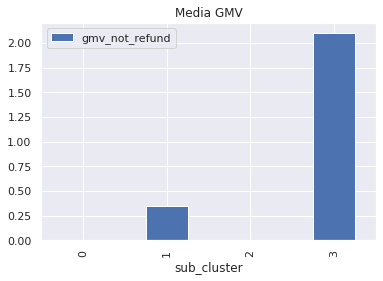

In [247]:
gra.plot(kind = 'bar',
            title = 'Media GMV')